In [191]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
%matplotlib inline

In [2]:
req = requests.get('https://www.billboard.com/charts/hot-100')

In [3]:
soup = BeautifulSoup(req.text,'lxml')

In [163]:
soup.find('ol',{'class':'chart-list__elements'}).find_all('button')[0].find_all('span',{'class':'chart-element__rank flex--column flex--xy-center flex--no-shrink'})[0].text.split('\n')[2]

'New'

In [61]:
singles = [span.find_all('span',{'class':'chart-element__information__song text--truncate color--primary'})[0].text for span in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [71]:
current_rank = [rank.find_all('span',{'class':'chart-element__rank__number'})[0].text for rank in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [123]:
last_week = [last.find_all('span',{'class':'chart-element__meta text--center color--secondary text--last'})[0].text for last in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [131]:
peak_rank = [peak.find_all('span',{'class':'chart-element__meta text--center color--secondary text--peak'})[0].text for peak in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [142]:
artists = [name.find_all('span',{'class':'chart-element__information__artist text--truncate color--secondary'})[0].text for name in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [151]:
duration = [nweek.find_all('span',{'class':'chart-element__meta text--center color--secondary text--week'})[0].text for nweek in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [165]:
current_status = [status.find_all('span',{'class':'chart-element__rank flex--column flex--xy-center flex--no-shrink'})[0].text.split('\n')[2] for status in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [171]:
zipped_results = zip(current_rank,singles,artists,current_status,last_week,peak_rank,duration)

In [172]:
bb100 = pd.DataFrame(zipped_results,columns=['Rank','Single','Artist','Status','Last Week','Peak','Duration']).set_index('Rank')

In [174]:
bb100.head(10)

,Single,Artist,Status,Last Week,Peak,Duration
Rank,,,,,,
1,Toosie Slide,Drake,New,-,1,1
2,Blinding Lights,The Weeknd,Failing,1,1,19
3,The Box,Roddy Ricch,Failing,2,1,18
4,Don't Start Now,Dua Lipa,Failing,3,2,23
5,Life Is Good,Future Featuring Drake,Steady,5,2,13
6,Circles,Post Malone,Failing,4,1,32
7,Adore You,Harry Styles,Failing,6,6,18
8,Say So,Doja Cat,Failing,7,7,14
9,Intentions,Justin Bieber Featuring Quavo,Failing,8,8,9


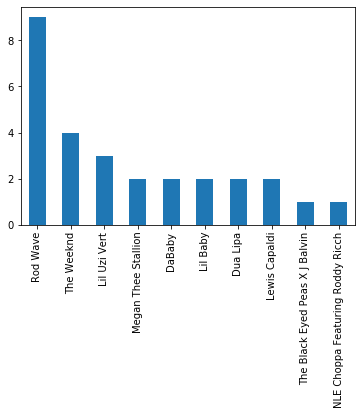

In [193]:
bb100['Artist'].value_counts().head(10).plot.bar()

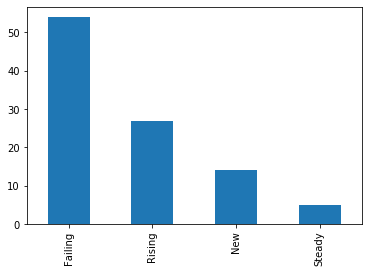

In [194]:
(bb100['Status'].value_counts()).plot.bar()

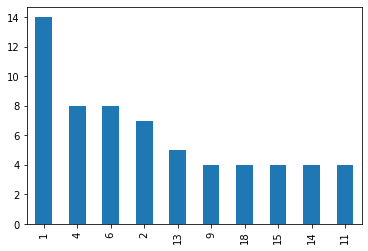

In [196]:
(bb100['Duration'].value_counts()).head(10).plot.bar()

In [ ]:
pd.plotting()